In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


**handling missing, categorical data**

In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
from sklearn.impute import SimpleImputer #replacing missing data
from sklearn.compose import ColumnTransformer #transfomer by cols

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_colunms =['id','age','trestbps','chol','thalch','oldpeak','ca']
categorical_colunms = ['sex','dataset','cp','fbs','restecg','exang','slope','thal','num']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_imputer, numeric_colunms),  
        ('categorical', categorical_imputer, categorical_colunms)  
    ])

imputed_data = pd.DataFrame(preprocessor.fit_transform(data))
imputed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,63.0,145.0,233.0,150.0,2.3,0.0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect,0
1,2.0,67.0,160.0,286.0,108.0,1.5,3.0,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal,2
2,3.0,67.0,120.0,229.0,129.0,2.6,2.0,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect,1
3,4.0,37.0,130.0,250.0,187.0,3.5,0.0,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal,0
4,5.0,41.0,130.0,204.0,172.0,1.4,0.0,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal,0


In [4]:
X = imputed_data.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,63.0,145.0,233.0,150.0,2.3,0.0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,2.0,67.0,160.0,286.0,108.0,1.5,3.0,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
2,3.0,67.0,120.0,229.0,129.0,2.6,2.0,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,4.0,37.0,130.0,250.0,187.0,3.5,0.0,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
4,5.0,41.0,130.0,204.0,172.0,1.4,0.0,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [5]:
y = imputed_data.iloc[:,-1]
y = y.astype('int') #change type of y


In [6]:
from sklearn.preprocessing import OneHotEncoder #encode the categorical data
encoder = OneHotEncoder(sparse_output=False)
X = pd.DataFrame(encoder.fit_transform(X))

X.shape

(920, 1452)

In [7]:
dataset = X.index
alpha = 0.8

tables = {0:[np.random.choice(dataset)]}
num_sample = 150
for _ in range(num_sample):
    probabilities = []
    
    for table, data_points in tables.items():
        table_size = len(data_points)
        probabilities.append(table_size)
    
    probabilities.append(alpha)
    probabilities = [prob/sum(probabilities) for prob in probabilities]
    
    table_index = np.random.choice(range(len(probabilities)), p=probabilities)
    
    if table_index == len(tables):
        last_table = list(tables.keys())[-1]
        tables[last_table+1] = [np.random.choice(dataset)]
    else:
        tables[table_index].append(np.random.choice(dataset))


import itertools
people = tables.values()
flat_list = list(itertools.chain.from_iterable(people))

resampled_X = X.loc[flat_list]
resampled_X.head()

,0,1,2,3,4,5,6,7,8,9,...,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451
869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
resampled_y = y.loc[resampled_X.index]
resampled_y.head()

869    3
447    0
64     2
859    2
97     3
Name: 15, dtype: int64

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


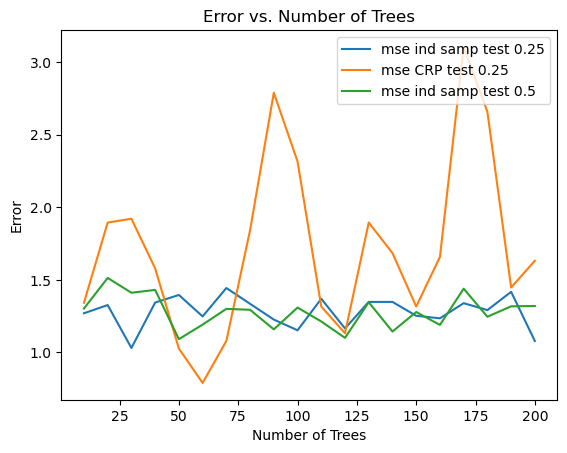

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def plot_metric_error(X, y, test_size=0.25,graph=''):
    mse_values = []

    for n_estimators in range(10, 201, 10):
        # Split the data into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size)

        model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
        model.fit(train_X, train_y)

        # Make predictions on the validation set
        val_pred = model.predict(val_X)

        # Calculate MSE and MAE
        mse = mean_squared_error(val_y, val_pred)

        # Append MSE and MAE to the respective lists
        mse_values.append(mse)

    # Plot OOB error
    plt.plot(range(10, 201, 10), mse_values, label="mse"+f'{graph}')
# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('Error') 
plt.title('Error vs. Number of Trees')

plot_metric_error(X, y, test_size=0.25,graph=' ind samp test 0.25')
plot_metric_error(resampled_X, resampled_y, test_size=0.25,graph=' CRP test 0.25')
plot_metric_error(X, y, test_size=0.5,graph=' ind samp test 0.5')

plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


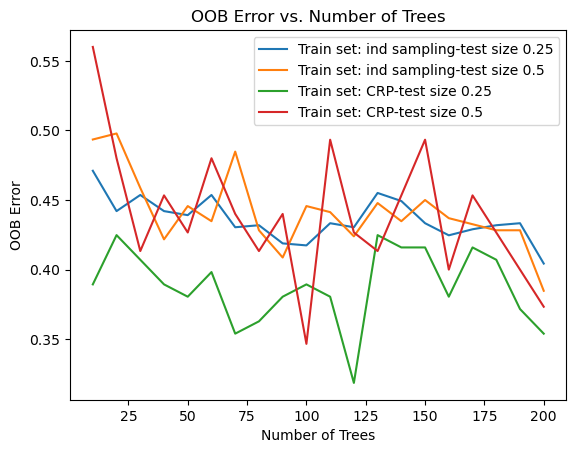

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


def plot_OOB_error(X, y, test_size=0.25, label =''):
    # Create an empty list to store OOB errors
    oob_errors = []

    for n_estimators in range(10, 201, 10):
        # Split the data into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size)

        model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
        model.fit(train_X, train_y)

        # Calculate OOB error
        oob_error = 1 - model.oob_score_
        oob_errors.append(oob_error)

    # Plot OOB error
    plt.plot(range(10, 201, 10), oob_errors, label=f"Train set: {label}")

# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees')

plot_OOB_error(X, y, test_size=0.25, label="ind sampling-test size 0.25")
plot_OOB_error(X, y, test_size=0.5, label="ind sampling-test size 0.5")
plot_OOB_error(resampled_X, resampled_y, test_size=0.25, label="CRP-test size 0.25")
plot_OOB_error(resampled_X, resampled_y, test_size=0.5, label="CRP-test size 0.5")
plt.legend()


plt.show()

In [11]:
'''from sklearn.utils.multiclass import type_of_target
# Check the label type
label_type = type_of_target(y)

# Print the label type
print("Label Type:", label_type)

these lines of code is for checking variables'type '''

'from sklearn.utils.multiclass import type_of_target\n# Check the label type\nlabel_type = type_of_target(y)\n\n# Print the label type\nprint("Label Type:", label_type)\n\nthese lines of code is for checking variables\'type '